# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import cv2
import os
# from patchify import patchify
from PIL import Image
from matplotlib import pyplot as plt
import tifffile
import pickle as pkl
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
# from keras.models import Model
# from keras.models import load_model

# Stacking and saving Images

In [12]:
# DIRECTORY = (r"C:\Users\tause\Advance_ANN\data")

# CATEGORIES = []
# for classes in os.listdir(DIRECTORY):
#     CATEGORIES += [classes]

# data = np.zeros((512,512,31))
# i=0
# for category in CATEGORIES:
#     path = os.path.join(DIRECTORY, category)
#     path = path + '\\' + CATEGORIES[i]
# #     print(path)
#     j=0
#     for img in os.listdir(path):
#         if(img==("Thumbs.db") or img==((CATEGORIES[i][:-2])+"RGB.bmp")):
#             continue
#         img_path = os.path.join(path, img)
#         arr = cv2.imread(img_path,0)
#         data[:,:,j] = arr
#         j+=1
# #     images = [Image.fromarray(data[:, :, i].astype('uint8')) for i in range(data.shape[2])]
# #     images[0].save((r"C:\Users\tause\Advance_ANN\Stacked\\")+(CATEGORIES[i][:-2]+"stacked.tiff"), format='TIFF', save_all=True, append_images=images[1:])
#     i+=1


In [13]:
# data.shape

In [14]:
# plt.imshow(data[:,:,3],cmap='gray')

# Reading Stacked Images

In [15]:
DIRECTORY = ("./drive/MyDrive/Advane_ANN/Stacked")

CATEGORIES = []
for classes in os.listdir(DIRECTORY):
    CATEGORIES += [classes]

# print(CATEGORIES)

data = []
i=0
for category in CATEGORIES:
    img_path = os.path.join(DIRECTORY, category)
    arr = cv2.imread(img_path,0)
    data.append(arr)

stacked = np.array(data)

In [16]:
stacked = np.transpose(stacked, (1, 2, 0))
stacked.shape

(512, 512, 32)

# Making Patches

In [17]:
def extract_blocks(image, block_size, stride):
    blocks = []
    image_height, image_width = image.shape[:2]
    num_blocks_x = image_width // stride
    num_blocks_y = image_height // stride
    for y in range(0,image_height-block_size[1]+1,stride):
        for x in range(0,image_width-block_size[0]+1,stride):
            block=image[y:y+block_size[1],x:x+block_size[0]]
            blocks.append(block)
    return blocks

In [18]:
def reconstruct_image(patches, image_size, block_size, stride):
    # Get patch size
    patch_size = block_size[0]

    # Calculate the number of patches in each direction
    n_patches_x = (image_size[1] - patch_size) // stride + 1
    n_patches_y = (image_size[0] - patch_size) // stride + 1

    # Initialize reconstructed image
    reconstructed_image = np.zeros(image_size)

    # Place patches in the reconstructed image
    patch_idx = 0
    for y in range(n_patches_y):
        for x in range(n_patches_x):
            patch = patches[patch_idx]
            reconstructed_image[y*stride:y*stride+patch_size, x*stride:x*stride+patch_size] = patch
            patch_idx += 1

    return reconstructed_image

In [19]:
patches = np.array(extract_blocks(stacked,(64,64),24))
len(patches)

361

In [21]:
# plt.imshow(stacked[:,:,2],cmap="gray")


In [22]:
# for i in range(361):
#     plt.subplot(19,19,i+1)
#     fig = plt.imshow(patches[i,:,:,2],cmap='gray')
#     fig.axes.get_xaxis().set_visible(False)
#     fig.axes.get_yaxis().set_visible(False)

In [23]:
orignal_image = reconstruct_image(patches = patches, image_size= stacked.shape, block_size = (64, 64),stride = 24)

In [24]:
orignal_image.shape

(512, 512, 32)

In [25]:
# plt.imshow(orignal_image[:,:,2],cmap="gray")

# Labels

In [26]:
y = np.array(patches)
y.shape

(361, 64, 64, 32)

In [27]:
y = y.astype(float)

# Making Dataset

In [28]:
x1 = tf.keras.layers.AveragePooling2D(pool_size=(8, 8),strides=(8, 8), padding='valid',dtype='float64')
x1 = x1(y)
x1.shape

TensorShape([361, 8, 8, 32])

In [29]:
x2_1 = y[:,:,:,0:11].mean(axis = 3)
x2_2 = y[:,:,:,11:22].mean(axis = 3)
x2_3 = y[:,:,:,22:].mean(axis = 3)

In [30]:
x2 = np.concatenate([np.expand_dims(x2_1,3),np.expand_dims(x2_2,3),np.expand_dims(x2_3,3)],axis = 3)
x2.shape

(361, 64, 64, 3)

# PreProcessing for Model

In [31]:
print("Labels-shape",y.shape)
print("Input_Feature-1 shape",x1.shape)
print("Input_Feature-2 shape",x2.shape)

Labels-shape (361, 64, 64, 32)
Input_Feature-1 shape (361, 8, 8, 32)
Input_Feature-2 shape (361, 64, 64, 3)


# Reshaping

In [32]:
# labels = layers.Flatten(dtype='float64')(y)
# print(labels.shape)
# feat1 = layers.Flatten(dtype='float64')(x1)
# print(feat1.shape)
# feat2 = layers.Flatten(dtype='float64')(x2)
# print(feat2.shape)

In [33]:
X_interploated = tf.image.resize(x1, (64, 64), method='bilinear')
X_interploated.shape

TensorShape([361, 64, 64, 32])

In [34]:
X = tf.concat([X_interploated, x2], axis=-1)
X.shape

TensorShape([361, 64, 64, 35])

In [35]:
X = X/255
y = y/255

# Standardization

In [ ]:
# labels = labels/255
# feat1 = feat1/255
# feat2 = feat2/255

In [ ]:
# feat_all = np.zeros((225,(np.array(feat1.shape[1])+np.array(feat2.shape[1]))))
# feat_all.shape

In [ ]:
# feat_all[:,0:np.array(feat1.shape[1])] = feat1
# feat_all[:,np.array(feat1.shape[1]):] = feat2

In [ ]:
# print(feat_all.shape)
# print(labels.shape)

# Model

In [ ]:
# model = tf.keras.Sequential(
#     [
#         layers.Input(shape=(14336,)),
#         layers.Dense(1024, activation="relu"),
#         layers.Dense(512, activation="relu"),
#         layers.Dense(512, activation="relu"),
#         layers.Dense(256, activation="relu"),
#         layers.Dense(256, activation="relu"),
#         layers.Dense(128, activation="relu"),
#         layers.Dense(64, activation="relu"),
#         layers.Dense(32, activation="relu"),
#         layers.Dense(131072,activation='sigmoid'),
#     ]
# )

In [ ]:
# model.compile(optimizer = "Adam", loss ="binary_crossentropy",metrics=['accuracy'])
# model.optimizer.lr = 0.001

In [ ]:
# history = model.fit(feat_all,labels,epochs = 50)

In [ ]:
# encoding_dim = 24  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# # This is our input image
# input_img = keras.Input(shape=(14336,))
# # "encoded" is the encoded representation of the input
# encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# # "decoded" is the lossy reconstruction of the input
# decoded = layers.Dense(14336, activation='sigmoid')(encoded)

# # This model maps an input to its reconstruction
# autoencoder = keras.Model(input_img, decoded)

In [ ]:
# encoder = keras.Model(input_img, encoded)

In [ ]:
# encoded_input = keras.Input(shape=(encoding_dim,))
# # Retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # Create the decoder model
# decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# autoencoder.fit(feat_all, feat_all, epochs=100, batch_size=256,)

In [ ]:
# t1 = np.zeros((58, 58, 128))
# t1.shape

In [ ]:
# t2 = np.reshape(t1,(,,-1))

In [ ]:
print(X.shape)
y.shape

(361, 64, 64, 35)


(361, 64, 64, 32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.12, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(317, 64, 64, 35)
(44, 64, 64, 35)
(317, 64, 64, 32)
(44, 64, 64, 32)


In [ ]:
for i in range(2,128):
    for j in range(2,200):
        if i*i*j==(60*60*64):
            print("i",i,"j",j)

i 40 j 144
i 48 j 100
i 60 j 64
i 80 j 36
i 96 j 25
i 120 j 16


In [ ]:
96-(33-1)

64

In [ ]:
model = tf.keras.Sequential(
    [
        layers.Input((64, 64, 35)),
        
        layers.Conv2D(filters = 32,kernel_size = (3,3),strides=1,padding="valid",activation="LeakyReLU"),
        #shape(batch_size, 62, 62, 32).
        
        layers.Conv2D(filters = 64,kernel_size = (3,3),strides=1,padding="valid",activation="LeakyReLU"),
        #(batch_size, 60, 60, 64).

        layers.Conv2D(filters = 64,kernel_size = (3,3),strides=1,padding="valid",activation="LeakyReLU"),
        #(batch_size, 58, 58, 64).

        layers.Conv2D(filters = 128,kernel_size = (3,3),strides=1,padding="valid",activation="LeakyReLU"),
        #(batch_size, 56, 56, 128).
        
        layers.Reshape((112 ,112 ,32)),
        
        layers.Conv2D(filters = 32,kernel_size = (49,49),strides=1,padding="valid",activation="LeakyReLU"),
        #(batch_size, 64, 64, 32).
   
        
#------------------------------------------------------------------------------------------------------        
#         layers.Conv2D(filters = 64,kernel_size = (5,5),strides=1,padding="valid",activation="relu"),
#         #(batch_size, 66, 66, 64).
        
#         layers.Conv2D(filters = 32,kernel_size = (3,3),strides=1,padding="valid",activation="relu"),
#         #(batch_size, 64, 64, 32).
    ]
)

In [ ]:
model.compile(optimizer = "Adam", loss ="binary_crossentropy",metrics=['accuracy'])

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)

In [ ]:
early_st = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,verbose=1)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 62, 62, 32)        10112     
                                                                 
 conv2d_31 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_32 (Conv2D)          (None, 58, 58, 64)        36928     
                                                                 
 conv2d_33 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 reshape_6 (Reshape)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 32)        2458656   
                                                                 
Total params: 2,598,048
Trainable params: 2,598,048
No

In [ ]:
history = model.fit(X,y,epochs = 80)#,validation_data=(X_test,y_test),callbacks=[reduce_lr,early_st])

Epoch 1/80
12/12 [==============================] - 2s 83ms/step - loss: 2.4348 - accuracy: 0.0168
Epoch 2/80
12/12 [==============================] - 1s 82ms/step - loss: 1.4548 - accuracy: 0.0306
Epoch 3/80
12/12 [==============================] - 1s 80ms/step - loss: 1.0693 - accuracy: 0.0831
Epoch 4/80
12/12 [==============================] - 1s 84ms/step - loss: 0.5859 - accuracy: 0.0472
Epoch 5/80
12/12 [==============================] - 1s 82ms/step - loss: 0.3694 - accuracy: 0.1159
Epoch 6/80
12/12 [==============================] - 1s 82ms/step - loss: 0.3273 - accuracy: 0.1411
Epoch 7/80
12/12 [==============================] - 1s 81ms/step - loss: 0.3175 - accuracy: 0.1945
Epoch 8/80
12/12 [==============================] - 1s 82ms/step - loss: 0.3138 - accuracy: 0.2326
Epoch 9/80
12/12 [==============================] - 1s 90ms/step - loss: 0.3123 - accuracy: 0.2597
Epoch 10/80
12/12 [==============================] - 1s 82ms/step - loss: 0.3116 - accuracy: 0.2643
Epoch 11/

# **Training Plots**

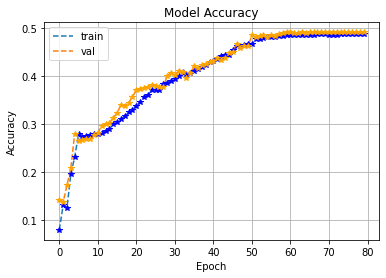

In [ ]:
plt.plot(history.history['accuracy'], linestyle="dashed")
plt.plot(history.history['val_accuracy'], linestyle="dashed")
plt.plot(history.history['accuracy'], "*", color="blue")
plt.plot(history.history['val_accuracy'], "*", color="orange")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
# plt.savefig('Model_AccuracyS2PS')
plt.show()

# # **Testing Plots**

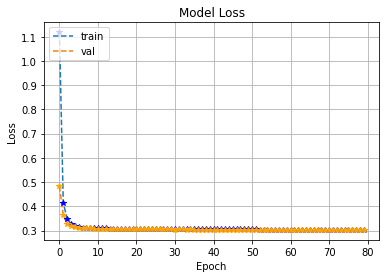

In [ ]:
plt.plot(history.history['loss'], linestyle="dashed")
plt.plot(history.history['val_loss'], linestyle="dashed")
plt.plot(history.history['loss'],"*", color="blue")
plt.plot(history.history['val_loss'], "*", color="orange")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
# pp.savefig('Model_lossS2PS')
# plt.show()

In [ ]:
# model.save(("./drive/MyDrive/Advane_ANN/fullsetfinal50.h5"))

In [8]:
model =  keras.models.load_model(r"C:\Users\tause\Advance_ANN\models\final50.h5")

ValueError: Unknown activation function: LeakyReLU

In [37]:
output = model.predict(X*255)

12/12 [==============================] - 10s 64ms/step


In [38]:
output.shape

(361, 64, 64, 32)

In [39]:
output = np.array(output)

In [40]:
model_image = reconstruct_image(patches = output, image_size= stacked.shape, block_size = (64, 64),stride = 24)

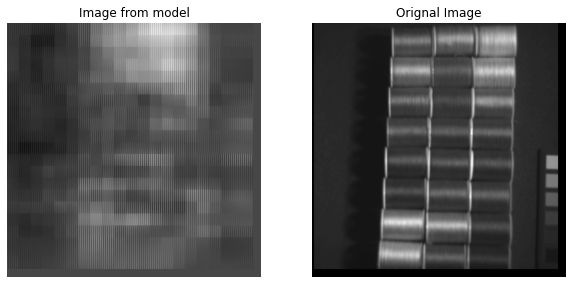

In [74]:
image_no = 31
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(model_image[:,:,image_no],cmap='gray')
ax1.axis('off')
ax2.set_title('Orignal Image')
ax2.imshow(orignal_image[:,:,image_no],cmap='gray')
ax2.axis('off')
ax1.set_title('Image from model')
plt.show()